In [11]:
import pandas as pd
import numpy as np
import thinkplot
import thinkstats2
import math
import matplotlib.pyplot as plt
import seaborn as sns

# Analytical Distributions

We can use analytical distributions to help us learn from our data, and to build towards using our data as a tool. 

Here we can start by using an analytical distribution to build a model that will help us to predict the daily investment return on the stock price of Microsoft. 
# 分析性分布

我们可以使用分析分布来帮助我们从数据中学习，并朝着使用数据作为工具的方向建立。

在这里，我们可以先用分析分布来建立一个模型，帮助我们预测微软公司股票价格的每日投资回报。


In [12]:
#Load data, loose the excess #加载数据，松开多余的部分
df = pd.read_csv('data/MSFT.csv')
df = df[['Date', 'Close']]
df.head()

,Date,Close
0,2018-01-01,88.190002
1,2018-01-08,89.599998
2,2018-01-15,90.000000
3,2018-01-22,94.059998
4,2018-01-29,91.779999


#### Data Preparation

We need to change the original data into the daily return. This code uses the diff() function to calculate the difference in price from yesterday to today. This daily gain/loss is then divided by the closing price to produce the daily percentage return, which is what we will look at. 
#### 数据准备

我们需要将原始数据改为每日回报。这段代码使用diff()函数来计算从昨天到今天的价格差异。然后用这个每日收益/损失除以收盘价，得出每日收益百分比，这就是我们要看的。

In [13]:
#Do a little manipulation to get the return #做一些小的操作来获得回报
df['diff'] = pd.Series(np.diff(df['Close']))
df['return'] = df['diff']/df['Close']
df = df[['Date', 'return']].dropna()
df.head()

,Date,return
0,2018-01-01,0.015988
1,2018-01-08,0.004464
2,2018-01-15,0.045111
3,2018-01-22,-0.024240
4,2018-01-29,-0.039224


Our new table is the daily return - i.e. if we invested in MSFT one day, what would the return be from my investment from one day to the next. 

The first two days can be taken as an example:
    - From day 1 to day 2 the price goes up apx $1.4
    - $1.4 dollars is approximately 1.6% of the first day price - ~$88
    - So if you invested on day one, you'd gain about 1.6%, or .016 <- That's the return value. 

We can do some of our graphing to take a little look-see and try to determine if this new distribution is normal:
我们的新表是每天的回报率--即如果我们一天投资于MSFT，我的投资从一天到另一天的回报率是多少。

前两天可以作为一个例子。
    - 从第1天到第2天，价格上升了约1.4美元
    - 1.4美元大约是第一天价格的1.6%--~88美元
    - 因此，如果你在第一天投资，你将获得约1.6%的收益，或0.016 <- 这就是回报值。

我们可以做一些图形，看一看，试图确定这个新的分布是否正常。

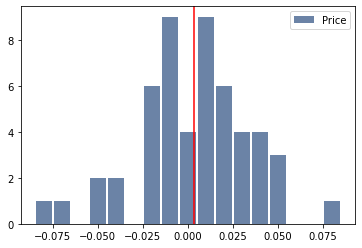

In [14]:
#Histogram
hi = thinkstats2.Hist(round(df["return"], 2), label="Price")
thinkplot.Hist(hi)
plt.axvline(df["return"].mean(), color="red")
thinkplot.Config()

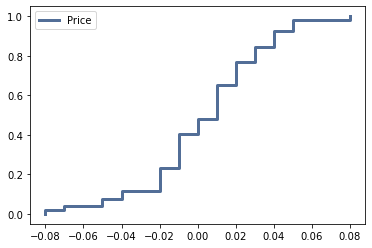

In [15]:
#CDF look
hi_c = thinkstats2.Cdf(hi)
thinkplot.Cdf(hi_c)
thinkplot.Config()

In [16]:
hi_c.Prob(0)

0.4807692307692308

### Check for Normality
### 检查是否正常

These charts look semi-normal, but not totally. Examine the probability plot to see it a bit closer. 

The thinkstats2 file provides this easy to use probability plot function. The book (pg 63ish) has the steps to make this broken out a little bit more. 

The most simple way I can think of to explain it is that it compares if the middle values are near the mean, the low values are near the low, and the high values are near the high. The model line is what we'd expect if the data was perfectly normal, in this one the middle values are close, the low values are a little lower than expected, the high values are a little lower than expected. 

In English, it is more or less normal for values close to the mean, but the values (the actual % return values) on either end of the distribution are a bit lower than we'd expect if it was normal. 


这些图表看起来是半正态的，但不完全是。检查一下概率图，可以看得更仔细一些。

thinkstats2文件提供了这个易于使用的概率图功能。书中（第63页左右）有步骤，可以让这一点更加细分。

我能想到的最简单的解释方法是，它比较中间值是否接近平均值，低值是否接近低值，高值是否接近高值。模型线是我们在数据完全正常的情况下所期望的，在这个模型中，中间值很接近，低值比预期的低一点，高值比预期的低一点。

用英语来说，对于接近平均值的数值来说，它或多或少是正常的，但是分布两端的数值（实际的回报率数值）比我们预期的正常值要低一点。

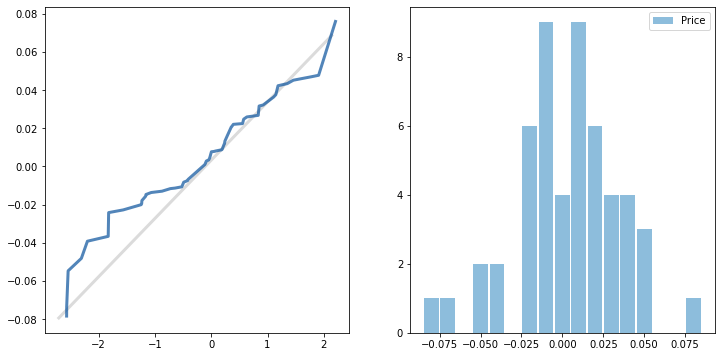

In [17]:
#Create probability plot#创建概率曲线图
thinkplot.clf()
thinkplot.PrePlot(2, 1, 2)    #暗示即将发生的事情。num：将要绘制的行数 rows：子图的行数 cols：子图的列数
thinkstats2.NormalProbabilityPlot(df["return"])
thinkplot.SubPlot(2)
thinkplot.Hist(hi)
thinkplot.Config()

#### Normality Check常态检查

The normal probability plot is constructed is a somewhat complex way, that we don't really care about, the interpretation is relatively simple though. 
<ul>
<li> The normal probability plot compares theoretical (i.e. a real normal distribution) values (in Z scores) on the x-axis, vs real quantities on the y-axis. 
<li> The straight reference line is a real normal distributions. 
<li> The dots/other line is our data. 
<li> <b> We read the graph by comparing the blue line to the grey line:</b>
构造正态概率图的方式有点复杂，我们并不真正关心，但解释相对简单。
<ul>
<li> 正态概率图比较 x 轴上的理论（即真实正态分布）值（以 Z 分数表示）与 y 轴上的实际量。
<li> 直线参考线是真正的正态分布。
<li> 点/其他线是我们的数据。
<li> <b> 我们通过比较蓝线和灰线来读取图表：</b>
    <ul>
    <li> If the blue line is overlapping the grey, that shows us that at that point on the x-axis (distance from mean), that the real data "matches" what we expect from a normal distribution. 
    <li> If the blue line is lower than the grey, that shows that at that point on the x-axis, the real data is lower than we'd expect if the distribution was perfectly normal. 
    <li> If the blue line is higher than the grey, that shows that at that point on the x-axis, the real data is higher than we'd expect if the distribution was perfectly normal. 
    </ul>
</ul>
<li> 如果蓝线与灰色线重叠，则表明在 x 轴上的那个点（与平均值的距离），真实数据“匹配”我们对正态分布的期望。
    <li> 如果蓝线低于灰线，则表明在 x 轴上的那个点，如果分布完全正态，实际数据低于我们预期的值。
    <li> 如果蓝线高于灰线，则表明在 x 轴上的该点，如果分布完全正态，实际数据高于我们预期的值。
<b>So a perfectly normal distribution will lie right on top of the grey line. The more separation from the grey, the "less normal" our data is.</b>

Does this one match the line? Is it normal? Ehhhhh.... kind of. The highest and lowest values are both lower than expected. For values near the mean, it is pretty close. 

We can live on the wild side, assume that it is close enough to normal, and 'use' that normality to do some stuff. 
因此，完全正态分布将位于灰线的正上方。与灰色的分离越多，我们的数据就越“不正常”。</b>

这个和这条线匹配吗？正常吗？呃……有点。最高和最低值都低于预期。对于接近平均值的值，它非常接近。

我们可以生活在狂野的一面，假设它足够接近正常，并“使用”这种正常来做一些事情。

### The Power of Being Normal
### 正常的力量

One of the super useful things about these analytical distributions is the simplicity. A normal curve is always the same basic shape, so all we need to do to create one is to know the mean (mu) and standard deviation (sigma). This allows us to easily extrapolate from what we know, and use all the attributes of the normal distribution. Again, this is an approximation, it is not bang on, but that is useful in a lot of cases. 
这些分析分布的超级有用的事情之一就是简单。正态曲线始终具有相同的基本形状，因此我们需要做的就是知道平均值 (mu) 和标准差 (sigma)。这使我们能够轻松地从我们所知道的情况中推断，并使用正态分布的所有属性。同样，这是一个近似值，它不是很好，但这在很多情况下很有用。

The fact that the data in our emperical sample will follow (we hope) that normal distribution pattern, we can apply all of the general knowledge of normal distributions to our situation - the knowledge that X% will fall within certain standard deviation ranges, the ability to infer percentiles, etc... This works even if we don't have a massive sample of data that would allow us to generate those distribution patterns from scratch. 
事实上，我们的经验样本中的数据将遵循（我们希望）正态分布模式，我们可以将所有正态分布的一般知识应用于我们的情况 - X% 将落在某些标准偏差范围内的知识，能力推断百分位数等......即使我们没有大量数据样本可以让我们从头开始生成这些分布模式，这也有效。

While everything in the world isn't normal, many things are, and that knowledge helps us substantially. We can safely assume things such as blood pressure are normally distributed, so if you are able to take a small sample of blood pressure from the population you're looking at, calculate the mean, count, and variance, and create an analytical distribution that you can generalize from confidently. 
虽然世界上的一切都不正常，但很多事情都是正常的，而这些知识对我们有很大帮助。我们可以安全地假设诸如血压之类的事物是正态分布的，因此，如果您能够从您正在查看的人群中抽取一小部分血压样本，计算平均值、计数和方差，并创建一个分析分布你可以自信地概括。

#### The Predictive Power of Analytical Distributions

One of the things that our analytical distribution relationship allows us to do is to have a pattern from which to make predictions from. For example, if we find that our daily return data:
<ul>
<li> Is normally distributed. 
<li> Has a mean and a standard distribution that we can calculate.
</ul>

We can then use that information to help us predict - for example if a day trader is trading MSFT stock and he notices that some shares he purchased earlier in the day are up an amount equal to 3 standard deviations in the normal distribution of the daily gain, that would tell the trader that his daily gain is above ~99% of all daily increases in the stock, so it is pretty likely they are in a good position to sell. This isn't definitive of course, the stock could skyrocket, but the more data we have and the better the data fits our model, the more accurate our predictions can be. This is a key concept of machine learning. 

#### 分析分布的预测能力

我们的分析分布关系允许我们做的一件事是有一个模式来进行预测。例如，如果我们发现我们的每日回报数据：
<ul>
<li> 是正态分布的。
<li> 具有我们可以计算的均值和标准分布。
</ul>

然后，我们可以使用该信息来帮助我们进行预测——例如，如果一个日内交易者正在交易 MSFT 股票，并且他注意到他在当天早些时候购买的一些股票的涨幅等于每日收益正态分布中的 3 个标准差，这将告诉交易者，他的每日收益高于股票所有每日涨幅的 99%，因此它们很可能处于良好的卖出位置。当然，这不是确定的，股票可能会飙升，但我们拥有的数据越多，数据越适合我们的模型，我们的预测就越准确。这是机器学习的一个关键概念。

In [64]:
#Create a normal distribution based on the characteristics of the kinda-normal data
#根据kinda-normal数据的特征创建一个正态分布
import scipy.stats
mu = df["return"].mean()
sigma = df["return"].std()
normz = scipy.stats.norm(mu, sigma)

### Samples### 样本

On thing we see here, and something that is common as we go, is taking a sample from a distribution. In this case we've created a normal distribution based on the emperical data's statistics. This distribution object isn't a dataset, it is a mathmatical representation of the distribution. 

Below, we want to graph our analytical distribution and compare it to the analytical one. To do so, we take a random sample of values that are generated from the distribution. Here we ask the distribution, "give me 10,000 values that fit the distribution that is in its settings". The distribution generates random numbers following the distribution pattern. The exact set of values that we get will be different each time, they are random; as we generate a large number, they will trend towards more closely following the "expectation" of the distribution. 

This idea of sampling will factor into what we do in the near future in important ways, of note:
<ul>
<li> When we are extracting a sample from a population, we need to evaluate if our sample is representitive of the population. 
<li> We can generate multiple samples, and count how likely it is to see certain values. This is how the +/- 5%, 19 times out of 20 thing that you see on polling results is derived. 
</ul>
关于我们在这里看到的事情，以及在我们进行时很常见的事情，就是从分布中抽取样本。在这种情况下，我们根据经验数据的统计创建了一个正态分布。此分布对象不是数据集，它是分布的数学表示。

下面，我们要绘制我们的分析分布并将其与分析分布进行比较。为此，我们对从分布中生成的值进行随机抽样。在这里，我们询问分布，“给我 10,000 个适合其设置中分布的值”。分布按照分布模式生成随机数。我们得到的确切值集每次都会不同，它们是随机的；随着我们生成大量数据，它们将趋向于更紧密地遵循分布的“预期”。

值得注意的是，这种抽样的想法将在不久的将来以重要的方式影响我们所做的事情：
<ul>
<li> 当我们从总体中提取样本时，我们需要评估我们的样本是否具有总体代表性。
<li>我们可以生成多个样本，并计算看到某些值的可能性。这就是您在投票结果中看到的 20 次中 +/- 5% 的 19 次的推导方式。
</ul>

scipy.stats.norm函数 可以实现正态分布（也就是高斯分布）
rvs:随机变量（就是从这个分布中抽一些样本）
pdf：概率密度函数。
cdf：累计分布函数
sf：残存函数（1-CDF）
ppf：分位点函数（CDF的逆）
isf：逆残存函数（sf的逆）
stats:返回均值，方差，（费舍尔）偏态，（费舍尔）峰度。
moment:分布的非中心矩。

function) histplot: (data: Any | None = None, *, x: Any | None = None, y: Any | None = None, hue: Any | None = None, weights: Any | None = None, stat: str = "count", bins: str = "auto", binwidth: Any | None = None, binrange: Any | None = None, discrete: Any | None = None, cumulative: bool = False, common_bins: bool = True, common_norm: bool = True, multiple: str = "layer", element: str = "bars", fill: bool = True, shrink: int = 1, kde: bool = False, kde_kws: Any | None = None, line_kws: Any | None = None, thresh: int = 0, pthresh: Any | None = None, pmax: Any | None = None, cbar: bool = False, cbar_ax: Any | None = None, cbar_kws: Any | None = None, palette: Any | None = None, hue_order: Any | None = None, hue_norm: Any | None = None, color: Any | None = None, log_scale: Any | None = None, legend: bool = True, ax: Any | None = None, **kwargs: Any) -> Any

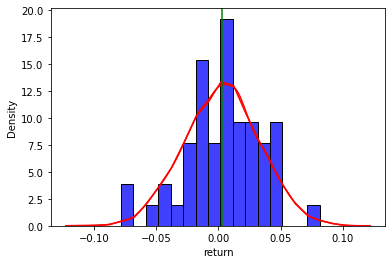

In [20]:
import seaborn as sns
sns.histplot(data=normz.rvs(10000), binwidth=.01, color="red", stat="density", kde=True, element="poly", fill=False)
sns.histplot(data=df["return"], binwidth=.01, color="blue", stat="density")
plt.axvline(mu, color="green")

#### Distribution Exercises

Try these!

In [65]:
#How many weekly returns are greater than 5%, but less than 10%?
#有多少周收益率大于5%但小于10%？
lowVal = normz.cdf(.05)
hiVal = normz.cdf(.1)
print(str(lowVal) + " : " + str(hiVal))
print(hiVal-lowVal)

0.9355110908938288 : 0.9991544890514654
0.06364339815763664


In [22]:
normz.cdf(0)

0.45880600312056974

### Test Normality Analytically

We have done our normality tests by visually inspecting the distribution. This works quite well, and we can rely on it going forward. There is also a way to do a normality test analytically. 

We'll do more on hypothesis testing later on, this is one example of it. We are basically doing a test that says, "do we have evidence that this data comes from a normal distribution?". The actual calculation is based on two things we'll look at more later - skew (left/right shift of distribution) and kurtosis (steepness of the peak of the distribution)

<b>Note:</b> this analytical test is not necessarily better than the visual one. The visual one is good, and if I am doing something, I would generally use that. In particular, it is much more informative if you have data that may be mostly normal, but differs largely due to something like a few outliers. We can see this visually when inspecting the normality, and take action like filter the outlier out. This test can be scripted, so automated processes can be created; as well, if a distribution is closer to a normal distribution pattern, this test will measure those small differences with more precision than the visual method. 

### 分析测试正态性

我们通过目视检查分布进行了正态性检验。这工作得很好，我们可以依靠它继续前进。还有一种方法可以分析地进行正态性检验。

稍后我们将在假设检验方面做更多工作，这就是其中的一个例子。我们基本上是在做一个测试，“我们有证据表明这些数据来自正态分布吗？”。实际计算是基于我们稍后会看到的两件事 - 偏斜（分布的左/右偏移）和峰度（分布峰值的陡峭度）

<b>注意：</b> 这种分析测试不一定比视觉测试好。视觉效果很好，如果我在做某事，我通常会使用它。特别是，如果您的数据可能大部分是正常的，但由于一些异常值等原因而在很大程度上有所不同，则它会提供更多信息。我们可以在检查正态性时直观地看到这一点，并采取诸如过滤掉异常值之类的措施。该测试可以编写脚本，因此可以创建自动化流程；同样，如果分布更接近正态分布模式，则此测试将以比视觉方法更精确的方式测量这些小差异。

In [23]:
#Check Normality with code
#用代码检查正态性
k2, p = scipy.stats.normaltest(df["return"]) #几个值返回 k2，p 选取p
p

0.23901164802625616

Hypothesis tests are framed in terms of rejecting or accepting a Null Hypothesis. Here our null hypothesis is "the data is normally distributed". Our test generates a value that measures (effectively) how confident we can be in rejecting that null hypothesis (the "p" value). Below, we check if that result meets our cutoff for confidence; the cutoff is commonly .05, but it varies (we'll look at it more later). 假设检验是根据拒绝或接受零假设来构建的。这里我们的零假设是“数据是正态分布的”。我们的测试生成了一个值，该值（有效地）衡量我们在拒绝零假设（“p”值）方面的信心。下面，我们检查该结果是否符合我们的置信度；截止值通常是 0.05，但它会有所不同（我们稍后会详细介绍）。

In this case, if our p-value is <.05, that meets our confidence cutoff for rejecting the NH, or stating that the data is not normal. If it is higher, we can't be all that confident, so we accept the hypothesis that the data is normal. A lower p value would require that we are more confident that we can reject the NH, a higher p value would require us to be less confident. 
在这种情况下，如果我们的 p 值 <.05，则符合我们拒绝 NH 或说明数据不正常的置信度截止值。如果它更高，我们就不能那么自信，所以我们接受数据正常的假设。较低的 p 值将要求我们更有信心我们可以拒绝 NH，较高的 p 值将要求我们不太自信。

In [24]:
#If we were to write out our decision....
#如果我们要写下我们的决定......
alpha = .05
if p < alpha:  # null hypothesis: x comes from a normal distribution# 零假设：x 来自正态分布
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

The null hypothesis cannot be rejected


### Exercise #1

Now try one...

<ul>
<li>Check and see if NFL weights data fits a normal dist.
<li>Create a normal analytical distribution based off of the emperical data.
<li>What percentage of people are between 265 and 325? 
    <ul>
    <li>Using the empirical?
    <li>Using the analytical?
    </ul>
<li>What percentage of people are greater than your weight, using both distributions?
</ul>

If you're fast, try with NBA Weights
在尝试一个...

<ul>
<li>检查 NFL 权重数据是否符合正常分布。
<li>根据经验数据创建正态分析分布。
<li>265 到 325 岁之间的人占多少？
    <ul>
    <li>使用经验？
    <li>使用解析？
    </ul>
<li>使用这两种分布时，有多少百分比的人比您的体重大？
</ul>

如果你速度很快，试试 NBA 重量

In [25]:
#Load data, filter out junk, put in series
#加载数据，过滤掉垃圾，放入串联
dfNFL = pd.read_csv("data/NFL.csv")
dfNFL = dfNFL[dfNFL["Weight (lbs)"] > 100]
nfl = pd.Series(dfNFL["Weight (lbs)"])
nfl.head()

0    185.0
1    235.0
2    230.0
3    255.0
4    305.0
Name: Weight (lbs), dtype: float64

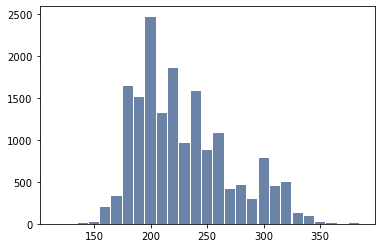

In [26]:
#Hist
nflh = thinkstats2.Hist(round(nfl, -1))
thinkplot.Hist(nflh)
thinkplot.Config()

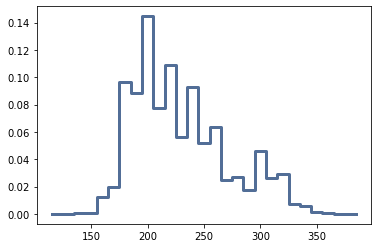

In [27]:
#pmf
nflp = thinkstats2.Pmf(round(nfl, -1))
thinkplot.Pmf(nflp)
thinkplot.Config()

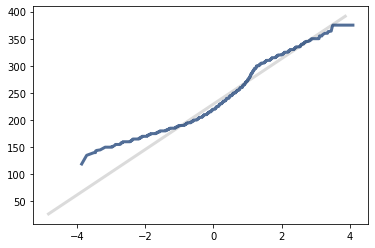

In [28]:
#Normal Prob Plot#Normal 概率图
thinkplot.clf
thinkstats2.NormalProbabilityPlot(nfl)

In [29]:
#Make analytical dist.
#进行分析分布。
mu1 = nfl.mean()
sigma1 = nfl.std()
mu1, sigma1

(229.52766405427536, 41.93305341008267)

In [30]:
#Make an analytical distribution
#进行解析分布
nflN = scipy.stats.norm(mu1,sigma1)

{'xscale': 'linear', 'yscale': 'linear'}

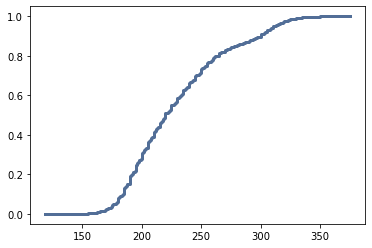

In [31]:
#Make an emperical CDF
#制作一个经验CDF
cdf_emp = thinkstats2.Cdf(nfl)
thinkplot.Cdf(cdf_emp)

In [32]:
#Use them. 
#What percentage of people are between 265 and 325
#使用它们。
#265到325之间的人占多少

less325 = cdf_emp.PercentileRank(325)
less325
less265 = cdf_emp.PercentileRank(265)
less265, less325
less325-less265

17.10726400748625

In [33]:
#Analytical
lessA = nflN.cdf(325)
lessA
lessB = nflN.cdf(265)
lessA-lessB

0.18739682507040945

In [34]:
#Who's fatter than me?
#谁比我胖？
empFat = (1 - cdf_emp.Prob(225))
anFat = (1 - nflN.cdf(225))
anFat, empFat

(0.5429916955198317, 0.45145631067961167)

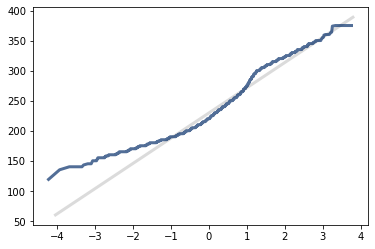

In [35]:
thinkstats2.NormalProbabilityPlot(nfl)

#### Treating Distribution as LogNormal (Skip to next section unless you're comfortable with this)

We'll look more at this soon, skip if it makes no sense. If you're comfortable, feel free to attempt. 

What if our data isn't actually normal, what if it is lognormal, how could we test that? 

#### 将分布视为 LogNormal（除非您对此感到满意，否则请跳到下一部分）

我们很快就会对此进行更多研究，如果没有意义，请跳过。如果你觉得舒服，请随意尝试。

如果我们的数据实际上不是正态的，如果它是对数正态的，我们如何测试呢？

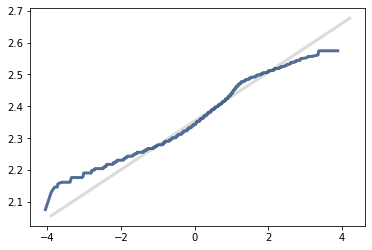

In [36]:
#LogNormal Prob Plot#LogNormal 概率图
thinkstats2.NormalProbabilityPlot(np.log10(nfl))

In [37]:
#Make Analytical Distribution
#进行分析分布
mu2 = nfl.mean()
sigma2 = nfl.std()
mu2, sigma2

(229.52766405427536, 41.93305341008267)

In [38]:
#Make model#制作模型
lnnfl = scipy.stats.lognorm(s=sigma2, scale=math.exp(mu2))


In [39]:
lnnfl.rvs(1000).mean()

1.0139799589590216e+160

In [40]:
ln325 = lnnfl.cdf(math.exp(325))
ln265 = lnnfl.cdf(math.exp(265))
ln325,ln265, (ln325-ln265)

(0.988600315792898, 0.8012034907224885, 0.18739682507040945)

### LogNormal Distribution

We can try another one - lognormal. LogNormal distributions are commonly seen in things like income, the distributions look like a normal distribution where the peak is "squished" to the left. 

Just like with a normal distribution, we can use the properties of a lognormal distribution if our data matches that distribution pattern. So we can run similar tests to evaluate our emperical distribution against lognormal. 

We will look at the salary distribution of people in Spain.

![Log Normal](images/lognorm_norm.png "Log Normal")
### 对数正态分布

我们可以尝试另一个 - 对数正态。 LogNormal 分布常见于诸如收入之类的事物中，分布看起来像一个正态分布，其中峰值向左“挤压”。

就像正态分布一样，如果我们的数据与该分布模式匹配，我们可以使用对数正态分布的属性。因此，我们可以运行类似的测试来评估我们对数正态分布的经验分布。

我们将看看西班牙人的工资分布。

![对数正常](images/lognorm_norm.png "对数正常")

In [41]:
#Load and preview data
dfSP = pd.read_csv("data/spain_salary.csv")
dfSP.head()

,year,state,gender,statistic,gross_income_euros
0,2017,nationwide,both,mean,23646.50
1,2016,nationwide,both,mean,23156.34
2,2015,nationwide,both,mean,23106.30
3,2014,nationwide,both,mean,22858.17
4,2013,nationwide,both,mean,22697.86


In [42]:
#I'm going to extract the income into a Pandas Series. This is a 1D data structure
#Not much differs in using it, but we should see it, it is common
#我要将收入提取到熊猫系列中。这是一维数据结构
#使用上差别不大，但是应该看出来，很常见
dfSP = dfSP[dfSP["statistic"] == "mean"]
spinc = pd.Series(dfSP["gross_income_euros"])
spinc

0       23646.50
1       23156.34
2       23106.30
3       22858.17
4       22697.86
          ...   
3185    23097.08
3186    23512.09
3187    23641.44
3188    23240.00
3189    22549.68
Name: gross_income_euros, Length: 540, dtype: float64

Do some basic preview stuff for a few cells....

In [43]:
spinc.describe()

count      540.000000
mean     21865.320611
std       3217.149924
min      16020.200000
25%      19344.052500
50%      21371.710000
75%      23773.370000
max      31618.970000
Name: gross_income_euros, dtype: float64

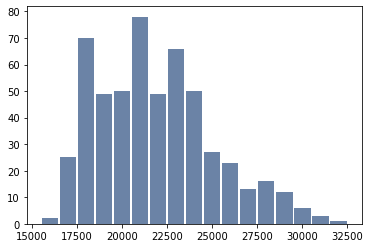

In [44]:
#Hist
histSP = thinkstats2.Hist(round(spinc, -3))
thinkplot.Hist(histSP)
thinkplot.Config()

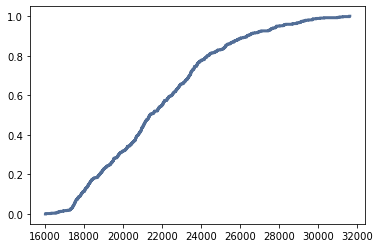

In [45]:
#CDF
cdfSP = thinkstats2.Cdf(spinc)
thinkplot.Cdf(cdfSP)
thinkplot.Config()

### LogNormal Tests   ### LogNormal 测试

LogNormal distributions are very common, they are like a normal distribution that is "bunched up" a bit towards the left had side. We see patterns like this pretty commonly in the real world, often around things like income. 
LogNormal 分布非常常见，它们就像一个正态分布，向左侧“聚集”了一点。我们在现实世界中非常普遍地看到这样的模式，通常围绕着收入之类的东西。
We can do the same things that we do with a lognormal distribution, or pretty much any other distribution, that we do with a normal distribution. 
我们可以用对数正态分布或几乎任何其他分布做同样的事情，就像用正态分布做的一样。
First, let's test and see if the data is normal? 
首先我们测试一下，数据是否正常？

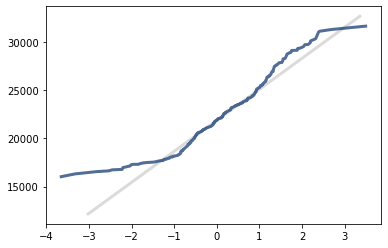

In [46]:
thinkstats2.NormalProbabilityPlot(spinc)

To check and see if our distribution is lognormal, we can just take the log and see if it is normal. The log transformation basically removes the thing that separates a lognormal distribution from a normal one, we can then do "normal" stuff with the transformed data. 

The idea of doing some mathmatical transformation to the data to make it easier to analyze is common.
要检查我们的分布是否是对数正态分布，我们可以取日志看看它是否正常。对数转换基本上消除了将对数正态分布与正态分布分开的东西，然后我们可以对转换后的数据做“正常”的事情。

对数据进行一些数学转换以使其更易于分析的想法很常见。 

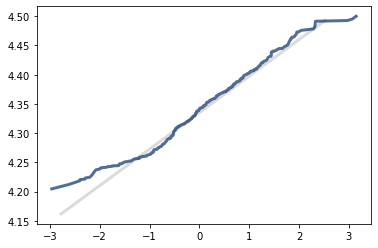

In [47]:
#Plot normal prob curve #绘制正态概率曲线
thinkstats2.NormalProbabilityPlot(np.log10(spinc))

<AxesSubplot:xlabel='gross_income_euros', ylabel='Count'>

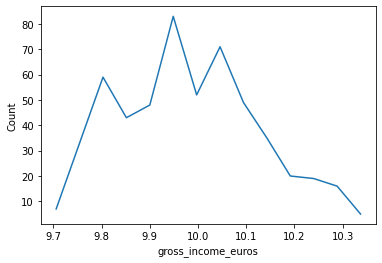

In [48]:
sns. histplot(data=np.log(spinc), element="poly", fill=False)

How about normal?

What do these mean? 

The lognormal looks to be slightly more accurate through the curve, it is probably a better representation. We can think of the areas where it departs and try to think of what is happening there:
<ul>
<li> At the top end, the highest incomes are less than we expect from the distribution. Thinking about the scenario, this seems reasonable - salaries do tend to flatten out at some point, and many highly compensated people aren't getting massive salaries, they get things like stock options. 
<li> At the bottom end, the incomes are higher than expected. This makes sense because we normally have a minimum wage, so they lowest paid people will only get so low. 
</ul>

<b> If we were really analyzing salaries in Spain, we could consider using a log normal distribution to model the "heart" of the distribution, and look at minimum wage and high earners separately. Depending on what we are doing, this may make a lot of sense. </b>
这些是什么意思？

通过曲线，对数正态看起来稍微更准确，它可能是更好的表示。我们可以考虑它离开的区域并尝试考虑那里发生的事情：
<ul>
<li> 在最高端，最高收入低于我们对分配的预期。考虑到这种情况，这似乎是合理的——工资确实在某个时候趋于平缓，许多高薪人士并没有得到高薪，他们得到的是股票期权之类的东西。
<li> 在底端，收入高于预期。这是有道理的，因为我们通常有最低工资，所以他们最低工资的人只会得到这么低。
</ul>

<b> 如果我们真的要分析西班牙的工资，我们可以考虑使用对数正态分布来模拟分布的“核心”，并分别查看最低工资和高收入者。根据我们正在做的事情，这可能很有意义。 </b>

### Exercise #2 - Test this Fit

We can try another, see if the wages in this data is normal or lognormal. 

The data is total contract size, in millions, for some soccer players in Europe. 
### 练习 #2 - 测试这个适合度

我们可以再试一下，看看这个数据中的工资是正态还是对数正态。

这些数据是欧洲一些足球运动员的总合同规模，以百万计。

In [49]:
df_fifa = pd.read_csv("data/fifa_eda.csv")
df_fifa = df_fifa[df_fifa["Wage"] > 0]
fifa = df_fifa["Wage"]
fifa.head()


0    565.0
1    405.0
2    290.0
3    260.0
4    355.0
Name: Wage, dtype: float64

In [50]:
fifa.describe()

count    17966.000000
mean         9.861850
std         22.117274
min          1.000000
25%          1.000000
50%          3.000000
75%          9.000000
max        565.000000
Name: Wage, dtype: float64

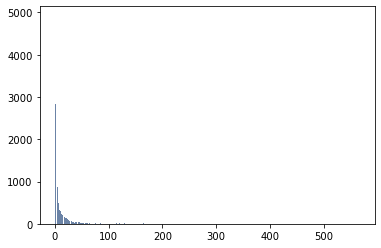

In [51]:
h = thinkstats2.Hist(fifa)
thinkplot.Hist(h)

##### Is it normal?

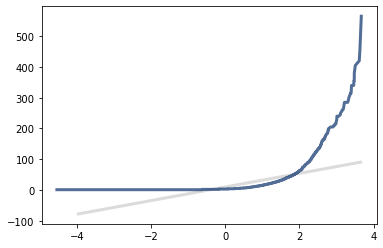

In [52]:
thinkstats2.NormalProbabilityPlot(fifa)

##### How About LogNormal?

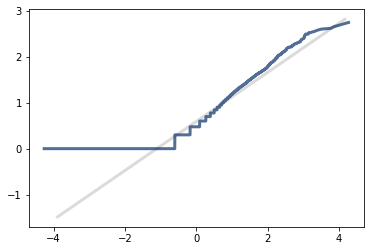

In [53]:
thinkstats2.NormalProbabilityPlot(np.log10(fifa))

#### CDF Analytical Model Tests

The book heavily leans on performing visual tests of analytical distributions using the CDF plots. The idea here is similar to the normal probability plots, the closer we match the expected values in the model, the closer the emperical data aligns with that distribution. 

Just like with the normal plot, the grey line represents a standard analytical distribution created with the stats of our emperical data. The blue line is our actual data, and the closer the two are to each other, the better the data fits the model. 
#### CDF 分析模型测试

这本书在很大程度上依赖于使用 CDF 图对分析分布进行可视化测试。这里的想法类似于正态概率图，我们越接近模型中的预期值，经验数据就越接近该分布。

就像正态图一样，灰线表示使用我们的经验数据的统计数据创建的标准分析分布。蓝线是我们的实际数据，两者越接近，数据越符合模型。

{'xscale': 'linear', 'yscale': 'linear'}

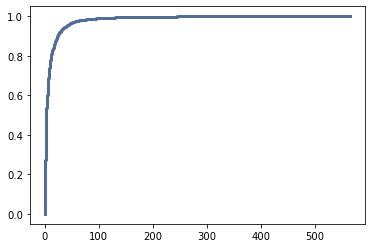

In [54]:
c = thinkstats2.Cdf(fifa)
thinkplot.Cdf(c)

In [55]:
# Create Log Transformed Data
log_wage = np.log10(fifa)
cdf_log = thinkstats2.Cdf(log_wage)

The text gives us some shortcuts to creating CDFs for analytical distributions. 

The comparison is similar to before, the more the lines match, the more our emperical data matches the analytical distribution. 
文本为我们提供了一些为分析分布创建 CDF 的捷径。

比较与之前类似，线匹配越多，我们的经验数据就越匹配分析分布。

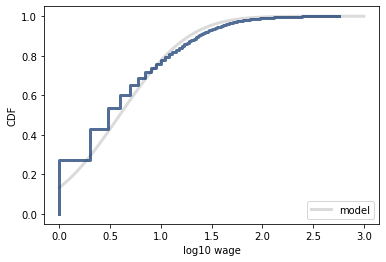

In [56]:
#Compare distribution to LogNormal
mu, sigma = log_wage.mean(), log_wage.std()
xs, ps = thinkstats2.RenderNormalCdf(mu, sigma, low=0, high=3)
thinkplot.Plot(xs, ps, label='model', color='0.8')
thinkplot.Cdf(cdf_log) 
thinkplot.Config(xlabel='log10 wage', ylabel='CDF', loc='lower right')

#### What if we Remove Outliers

Take the big money millionaires out and see if we have a matching pattern for the bulk of the data. 

#### 如果我们删除异常值怎么办

把大手笔的百万富翁拿出来，看看我们是否有大量数据的匹配模式。

In [57]:
df_out = df_fifa[df_fifa["Wage"] < 100]
fifa_out = df_out["Wage"]

Let's check the look of it

<AxesSubplot:xlabel='Wage', ylabel='Count'>

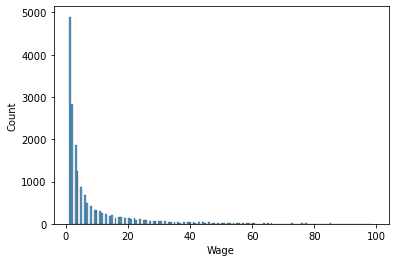

In [58]:
sns.histplot(fifa_out)

Check for normality with a probability plot.

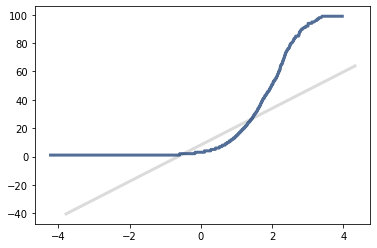

In [59]:
thinkstats2.NormalProbabilityPlot(fifa_out)

Looks bad, check for lognormal. 看起来很糟糕，检查对数正态。

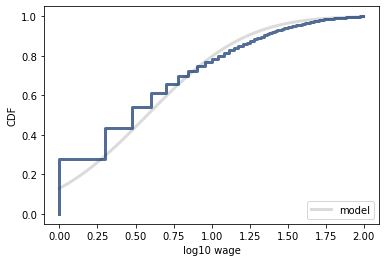

In [60]:
#Compare distribution to LogNormal
log_wage_out = np.log10(fifa_out)
cdf_log_out = thinkstats2.Cdf(log_wage_out)

mu_out, sigma_out = log_wage_out.mean(), log_wage_out.std()
xs_out, ps_out = thinkstats2.RenderNormalCdf(mu_out, sigma_out, low=0, high=2)
thinkplot.Plot(xs_out, ps_out, label='model', color='0.8')
thinkplot.Cdf(cdf_log_out) 
thinkplot.Config(xlabel='log10 wage', ylabel='CDF', loc='lower right')

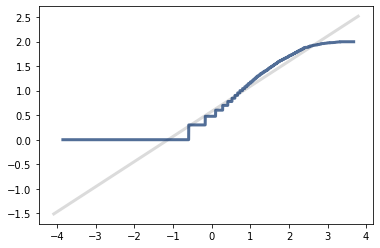

In [61]:
thinkstats2.NormalProbabilityPlot(log_wage_out)

What's the final conclusion?

It looks like at the very high end, our data is a little lower than we'd expect with a lognormal distribution (for an assorted number of sports specific reasons, this sounds at least reasonable). The primary departure is at the very low end, where the results are well above the expectation of the analytical distribution. This should make sense, if we had a real distribution, the left side of the peak would taper down. Here, in our data it doesn't, it appears to flatten out. If we look at our data, and think about the scenario, this makes sense, because there is a minimum that people are paid. The lowest paid players are likely all grouped around some "league min" (whether by rule or convention) value, rather than tapering down to 0. So these low end salaries don't decline as the "proper" distribution would. 
最后的结论是什么？

看起来在非常高端的情况下，我们的数据比我们预期的对数正态分布要低一些（出于各种运动特定的原因，这听起来至少是合理的）。主要偏离处于非常低端，其结果远高于分析分布的预期。这应该是有道理的，如果我们有一个真实的分布，峰值的左侧会逐渐变细。在这里，在我们的数据中它没有，它似乎变平了。如果我们查看我们的数据并考虑这种情况，这是有道理的，因为人们得到了最低限度的报酬。最低薪球员可能都围绕一些“联盟最低”（无论是规则还是惯例）价值分组，而不是逐渐减少到 0。因此，这些低端工资不会像“适当”分配那样下降。

<AxesSubplot:xlabel='Wage', ylabel='Count'>

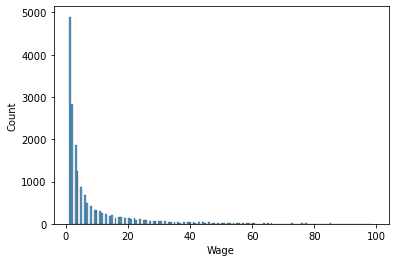

In [62]:
sns.histplot(fifa_out)